In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sampleSize = 8
randomImages = np.random.randint(0, 100, size=sampleSize)
sampleImages = np.array(os.listdir('data/train_v2/'))[randomImages]

## There are different picture characteristics. Clouds, haze, land or floating platforms. Here you can find some examples.

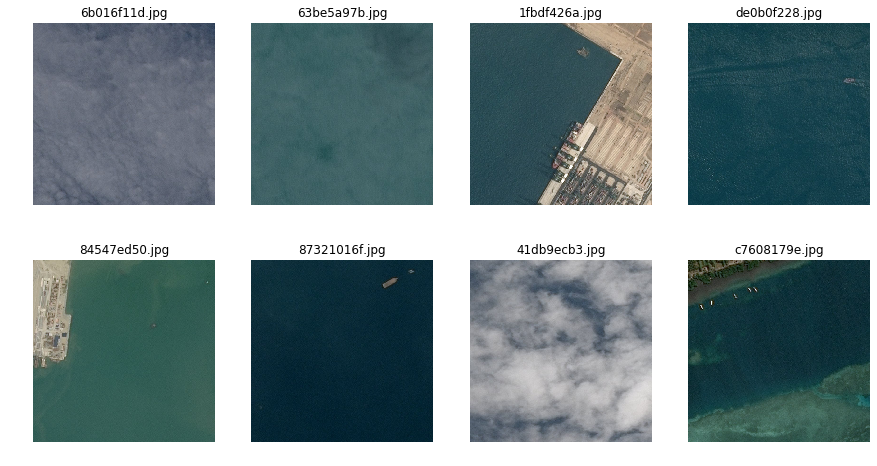

In [5]:
# Sample some images from dataset
nCols = 4
f, axarr = plt.subplots(sampleSize // nCols, nCols, figsize=(15, 8))
for i, name in enumerate(sampleImages):
    axarr[i//nCols, i%nCols].imshow(plt.imread('data/train_v2/' + name, format='jpg'))
    axarr[i//nCols, i%nCols].set_title(name)
    axarr[i//nCols, i%nCols].axis('off')
plt.show()
f.clf()

## We are given a csv file with the target rectangles that our model must be able to create after training.

In [28]:
df = pd.read_csv('data/train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


## Let's see the selected pixels for the third image above.

In [111]:
def decodePixels(encodedPixels, imageShape):
    '''Decode an array of pixels in run-length encoding format.'''
    pixels = np.array(encodedPixels.split(), dtype=int)
    region = []
    for i, p in enumerate(pixels):
        if i%2:
            region += [(pixels[i-1] % imageShape[1] + p, pixels[i-1] // imageShape[1])]
        else:
            region += [(p % imageShape[1], p // imageShape[1])]
    
    return region

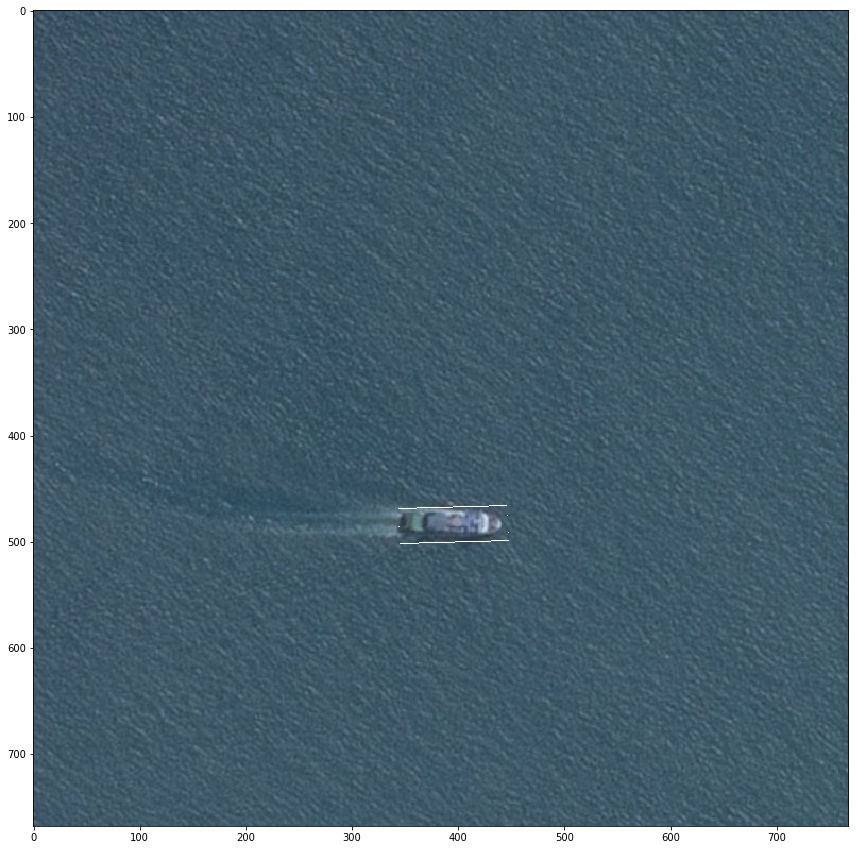

In [109]:
im = plt.imread('data/train_v2/000155de5.jpg', format='jpg')
imCopy = im.copy()
region = decodePixels(df.iloc[2].EncodedPixels, im.shape)
for r in region:
    imCopy[r] = np.array([255, 255, 255])
plt.imshow(imCopy)
f = plt.gcf()
f.set_figwidth(15)
f.set_figheight(15)